In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import re

In [152]:
scripts_path = os.path.abspath(os.path.join(os.getcwd(), '../Scripts'))
sys.path.append(scripts_path)
# Debug: Print the Python path
print("Python Path:", sys.path)
# Debug: List files in the Scripts directory
print("Files in Scripts Directory:", os.listdir(scripts_path))

Python Path: ['c:\\Users\\Usuario\\anaconda3\\python312.zip', 'c:\\Users\\Usuario\\anaconda3\\DLLs', 'c:\\Users\\Usuario\\anaconda3\\Lib', 'c:\\Users\\Usuario\\anaconda3', '', 'C:\\Users\\Usuario\\AppData\\Roaming\\Python\\Python312\\site-packages', 'C:\\Users\\Usuario\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32', 'C:\\Users\\Usuario\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32\\lib', 'C:\\Users\\Usuario\\AppData\\Roaming\\Python\\Python312\\site-packages\\Pythonwin', 'c:\\Users\\Usuario\\anaconda3\\Lib\\site-packages', 'c:\\Users\\Usuario\\anaconda3\\Lib\\site-packages\\win32', 'c:\\Users\\Usuario\\anaconda3\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Usuario\\anaconda3\\Lib\\site-packages\\Pythonwin', 'c:\\Imane_BENZEGUNINE\\Data_eng_project\\clone2\\CarBrain-main\\CARBRAIN\\Scripts', 'c:\\Imane_BENZEGUNINE\\Data_eng_project\\clone2\\CarBrain-main\\CARBRAIN\\Scripts', 'c:\\Imane_BENZEGUNINE\\Data_eng_project\\clone2\\CarBrain-main\\CARBRAIN\\Scripts', '

In [153]:
from path import PATH_PARK_XLSX, PATH_PARK_CSV

ImportError: cannot import name 'PATH_PARK_XLSX' from 'path' (C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\path\__init__.py)

## 1 - Import Data

In [72]:
data = pd.read_csv(PATH_PARK_CSV)

In [73]:
data2 = data.copy()

In [74]:
data2.head()

Car  \
0         GWM ORA 03 Hatchback (2025 onwards) Review   
1   Renault 5 E-Tech Hatchback (2025 onwards) Review   
2       Suzuki Swift Hatchback (2024 onwards) Review   
3        MINI Cooper Hatchback (2024 onwards) Review   
4  MINI Cooper Electric Hatchback (2024 onwards) ...   

                                               Quote       Ranking  \
0  Interesting alternative to mainstream EVs, now...  2.7 out of 5   
1                     Affordable style and substance  4.5 out of 5   
2                More polished Swift a hoot to drive  3.9 out of 5   
3                   The definitive city car, refined  4.1 out of 5   
4             Much improved second-gen electric MINI  4.1 out of 5   

            NewPrice                                              Pros+  \
0  £24,940 - £32,940  Well specified for the money\nPlush, airy inte...   
1  £22,995 - £28,995       Classy interior\nTidy handling\nFrom £23,000   
2  £19,209 - £21,559  Good fun to drive\nSlick gearbox\nStill fairly...   
3  £23,270 - £36,570  Great fun to drive\nCool styling\nUpmarket int...   
4  £39,120 - £42,920  Sharp handling and strong performance\nFantast...   

                                               Cons-  link  
0  Tiny boot\nPoor infotainment\nZero brand recog...     1  
1  Real-world range around 175 miles, 140 in wint...     1  
2  Rivals have plusher interiors...\n...and bette...     1  
3  No manual option\nLimited boot space\nCramped ...     1  
4  Interior plastics could be better\nThree-door ...     1

## 2 - EDA

#### 2 - 1 Nan Values

In [75]:
data2.isna().sum()

Car         0
Quote       0
Ranking     0
NewPrice    0
Pros+       0
Cons-       0
link        0
dtype: int64

<Axes: >

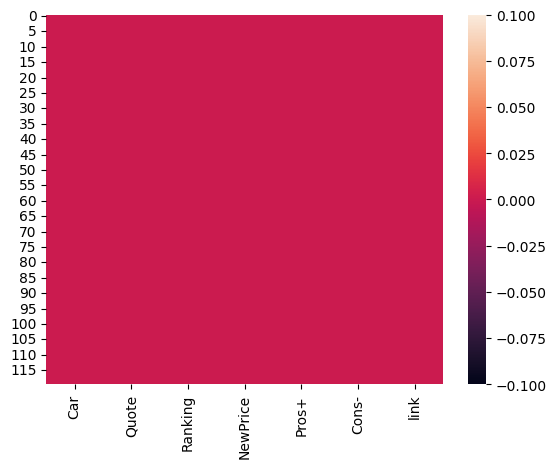

In [76]:
sns.heatmap(data2.isna())

#### 2 - 2 data-info

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Car       120 non-null    object
 1   Quote     120 non-null    object
 2   Ranking   120 non-null    object
 3   NewPrice  120 non-null    object
 4   Pros+     120 non-null    object
 5   Cons-     120 non-null    object
 6   link      120 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 6.7+ KB


#### 2 - 3 Data Cleaning

##### 2 - 3.1 FullCareName

In [78]:
def extractName(text):
    words=text.split()
    return ' '.join(words[:-1])

In [79]:
data2['CarType'] = data2['Car'].apply(extractName)

In [80]:
data2.head()

Car  \
0         GWM ORA 03 Hatchback (2025 onwards) Review   
1   Renault 5 E-Tech Hatchback (2025 onwards) Review   
2       Suzuki Swift Hatchback (2024 onwards) Review   
3        MINI Cooper Hatchback (2024 onwards) Review   
4  MINI Cooper Electric Hatchback (2024 onwards) ...   

                                               Quote       Ranking  \
0  Interesting alternative to mainstream EVs, now...  2.7 out of 5   
1                     Affordable style and substance  4.5 out of 5   
2                More polished Swift a hoot to drive  3.9 out of 5   
3                   The definitive city car, refined  4.1 out of 5   
4             Much improved second-gen electric MINI  4.1 out of 5   

            NewPrice                                              Pros+  \
0  £24,940 - £32,940  Well specified for the money\nPlush, airy inte...   
1  £22,995 - £28,995       Classy interior\nTidy handling\nFrom £23,000   
2  £19,209 - £21,559  Good fun to drive\nSlick gearbox\nStill fairly...   
3  £23,270 - £36,570  Great fun to drive\nCool styling\nUpmarket int...   
4  £39,120 - £42,920  Sharp handling and strong performance\nFantast...   

                                               Cons-  link  \
0  Tiny boot\nPoor infotainment\nZero brand recog...     1   
1  Real-world range around 175 miles, 140 in wint...     1   
2  Rivals have plusher interiors...\n...and bette...     1   
3  No manual option\nLimited boot space\nCramped ...     1   
4  Interior plastics could be better\nThree-door ...     1   

                                         CarType  
0            GWM ORA 03 Hatchback (2025 onwards)  
1      Renault 5 E-Tech Hatchback (2025 onwards)  
2          Suzuki Swift Hatchback (2024 onwards)  
3           MINI Cooper Hatchback (2024 onwards)  
4  MINI Cooper Electric Hatchback (2024 onwards)

##### 2 - 3.2 Ranking

In [81]:
def extractRank(text):
    words=text.split()
    return words[0]

In [83]:
data2['Rank'] = data2['Ranking'].apply(extractRank)

In [84]:
data2.head()

Car  \
0         GWM ORA 03 Hatchback (2025 onwards) Review   
1   Renault 5 E-Tech Hatchback (2025 onwards) Review   
2       Suzuki Swift Hatchback (2024 onwards) Review   
3        MINI Cooper Hatchback (2024 onwards) Review   
4  MINI Cooper Electric Hatchback (2024 onwards) ...   

                                               Quote       Ranking  \
0  Interesting alternative to mainstream EVs, now...  2.7 out of 5   
1                     Affordable style and substance  4.5 out of 5   
2                More polished Swift a hoot to drive  3.9 out of 5   
3                   The definitive city car, refined  4.1 out of 5   
4             Much improved second-gen electric MINI  4.1 out of 5   

            NewPrice                                              Pros+  \
0  £24,940 - £32,940  Well specified for the money\nPlush, airy inte...   
1  £22,995 - £28,995       Classy interior\nTidy handling\nFrom £23,000   
2  £19,209 - £21,559  Good fun to drive\nSlick gearbox\nStill fairly...   
3  £23,270 - £36,570  Great fun to drive\nCool styling\nUpmarket int...   
4  £39,120 - £42,920  Sharp handling and strong performance\nFantast...   

                                               Cons-  link  \
0  Tiny boot\nPoor infotainment\nZero brand recog...     1   
1  Real-world range around 175 miles, 140 in wint...     1   
2  Rivals have plusher interiors...\n...and bette...     1   
3  No manual option\nLimited boot space\nCramped ...     1   
4  Interior plastics could be better\nThree-door ...     1   

                                         CarType Rank  
0            GWM ORA 03 Hatchback (2025 onwards)  2.7  
1      Renault 5 E-Tech Hatchback (2025 onwards)  4.5  
2          Suzuki Swift Hatchback (2024 onwards)  3.9  
3           MINI Cooper Hatchback (2024 onwards)  4.1  
4  MINI Cooper Electric Hatchback (2024 onwards)  4.1

##### 2 - 3.3 CarPrice

In [113]:
def extractColumnPrice(text):
    cleaned_text = re.sub(r'[^\w-]', '', text)
    words=cleaned_text.split('-')
    return pd.Series(words)

In [114]:
data2[['Price1','Price2']] = data2['NewPrice'].apply(extractColumnPrice)

In [115]:
data2.head()

Car  \
0         GWM ORA 03 Hatchback (2025 onwards) Review   
1   Renault 5 E-Tech Hatchback (2025 onwards) Review   
2       Suzuki Swift Hatchback (2024 onwards) Review   
3        MINI Cooper Hatchback (2024 onwards) Review   
4  MINI Cooper Electric Hatchback (2024 onwards) ...   

                                               Quote       Ranking  \
0  Interesting alternative to mainstream EVs, now...  2.7 out of 5   
1                     Affordable style and substance  4.5 out of 5   
2                More polished Swift a hoot to drive  3.9 out of 5   
3                   The definitive city car, refined  4.1 out of 5   
4             Much improved second-gen electric MINI  4.1 out of 5   

            NewPrice                                              Pros+  \
0  £24,940 - £32,940  Well specified for the money\nPlush, airy inte...   
1  £22,995 - £28,995       Classy interior\nTidy handling\nFrom £23,000   
2  £19,209 - £21,559  Good fun to drive\nSlick gearbox\nStill fairly...   
3  £23,270 - £36,570  Great fun to drive\nCool styling\nUpmarket int...   
4  £39,120 - £42,920  Sharp handling and strong performance\nFantast...   

                                               Cons-  link  \
0  Tiny boot\nPoor infotainment\nZero brand recog...     1   
1  Real-world range around 175 miles, 140 in wint...     1   
2  Rivals have plusher interiors...\n...and bette...     1   
3  No manual option\nLimited boot space\nCramped ...     1   
4  Interior plastics could be better\nThree-door ...     1   

                                         CarType Rank Price1 Price2  
0            GWM ORA 03 Hatchback (2025 onwards)  2.7  24940  32940  
1      Renault 5 E-Tech Hatchback (2025 onwards)  4.5  22995  28995  
2          Suzuki Swift Hatchback (2024 onwards)  3.9  19209  21559  
3           MINI Cooper Hatchback (2024 onwards)  4.1  23270  36570  
4  MINI Cooper Electric Hatchback (2024 onwards)  4.1  39120  42920

In [116]:
data2.drop(["NewPrice", "Ranking", "Car"], axis = 1, inplace=True)

In [117]:
data2

Quote  \
0    Interesting alternative to mainstream EVs, now...   
1                       Affordable style and substance   
2                  More polished Swift a hoot to drive   
3                     The definitive city car, refined   
4               Much improved second-gen electric MINI   
..                                                 ...   
115                       Unparalleled value for an EV   
116                              Odd name, decent car.   
117  Serene open-topped experience, but you pay han...   
118  Abarth's first EV hot hatch is fun but comprom...   
119  One-star safety and poor handling mar Dacia's ...   

                                                 Pros+  \
0    Well specified for the money\nPlush, airy inte...   
1         Classy interior\nTidy handling\nFrom £23,000   
2    Good fun to drive\nSlick gearbox\nStill fairly...   
3    Great fun to drive\nCool styling\nUpmarket int...   
4    Sharp handling and strong performance\nFantast...   
..                                                 ...   
115  Fantastic value\nVery well equipped for the pr...   
116  Terrific value and efficiency\nStrong accelera...   
117  It’s an electric convertible!\nSerene driving ...   
118  Exciting looks\nCompact and agile\nPremium int...   
119  One of the cheapest new EVs you buy\nInterior ...   

                                                 Cons-  link  \
0    Tiny boot\nPoor infotainment\nZero brand recog...     1   
1    Real-world range around 175 miles, 140 in wint...     1   
2    Rivals have plusher interiors...\n...and bette...     1   
3    No manual option\nLimited boot space\nCramped ...     1   
4    Interior plastics could be better\nThree-door ...     1   
..                                                 ...   ...   
115  Very few options to customise\nOnly one, weak ...     1   
116  Boot not the largest\nCould be more fun to dri...     1   
117  Costs the same as a Porsche Boxster\nMaximum r...     1   
118  Not as fun as petrol models\nSound generator i...     1   
119  One-star Euro NCAP safety rating\nVery flawed ...     1   

                                               CarType Rank Price1 Price2  
0                  GWM ORA 03 Hatchback (2025 onwards)  2.7  24940  32940  
1            Renault 5 E-Tech Hatchback (2025 onwards)  4.5  22995  28995  
2                Suzuki Swift Hatchback (2024 onwards)  3.9  19209  21559  
3                 MINI Cooper Hatchback (2024 onwards)  4.1  23270  36570  
4        MINI Cooper Electric Hatchback (2024 onwards)  4.1  39120  42920  
..                                                 ...  ...    ...    ...  
115             LEAPMOTOR T03 Hatchback (2024 onwards)    3  15995  15995  
116               BYD Dolphin Hatchback (2023 onwards)  3.6  26195  31695  
117  MINI Electric Convertible Convertible (2023 - ...    2  24209  31413  
118               Abarth 500e Hatchback (2023 onwards)  3.5  29975  34475  
119              Dacia Spring Hatchback (2023 onwards)  1.5  14995  16995  

[120 rows x 8 columns]